# Logistic Regression with Python

# 1. Import necassary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline

# 2. Load the churn dataset

In [2]:
df=pd.read_csv("churnData.csv")

# 3. Visualize and preprocessing the data

In [3]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
df.shape

(200, 28)

In [5]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [8]:
### This dataframe has 27 features, we don't need all of them, so we can make new datafram based on our required features

In [6]:
df=df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip','callcard', 'wireless','churn']]
df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,1.0


In [7]:
df.dtypes

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
churn       float64
dtype: object

In [ ]:
#the characteristics of the features differ greatly between their ranges,
# for example age has numbers between 20 to 60 while education differs from 1-5, so we need to use sklearn to preprocess them 

In [9]:
features=df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip','callcard', 'wireless']]
X=np.asarray(features)
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.,   0.]])

In [10]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148]])

In [12]:
df['churn']=df['churn'].astype('int')
y=np.asarray(df["churn"])
y[0:5]


array([1, 1, 0, 0, 0])

# 3. Train/Test split

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=4)
print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (160, 9) (160,)
Test set:  (40, 9) (40,)


# 4. Modeling (Logistic Regression with Scikit-learn)

In [14]:
LR=LogisticRegression(C=0.15, solver='liblinear')
LR.fit(X_train, y_train)
LR

LogisticRegression(C=0.15, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
yhat=LR.predict(X_test)
print(y_test[0:5])
print(yhat[0:5])

[0 0 1 0 1]
[0 0 0 0 0]


In [16]:
yhat_prob=LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.80994546, 0.19005454],
       [0.71365411, 0.28634589],
       [0.62913668, 0.37086332],
       [0.91635527, 0.08364473],
       [0.66754347, 0.33245653]])

# 5. Evaluation

In [17]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.5405405405405406

In [18]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.5364225781845919

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[20,  5],
       [12,  3]], dtype=int64)

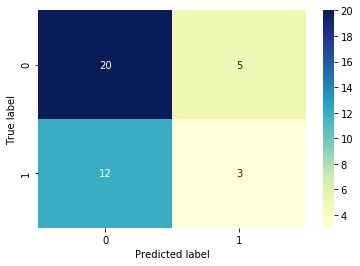

In [21]:
sns.heatmap(confusion_matrix(y_test, yhat), annot=True, cmap="YlGnBu")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yhat)

0.575